In [51]:
import numpy as np
import pandas as pd

In [52]:
Data = pd.read_csv(r'data/HRAnalytics.csv')

In [53]:
Data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [54]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 satisfaction_level      14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [55]:
columns = Data.columns.tolist()

In [56]:
columns

[' satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

In [58]:
categorical=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','sales','salary']

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

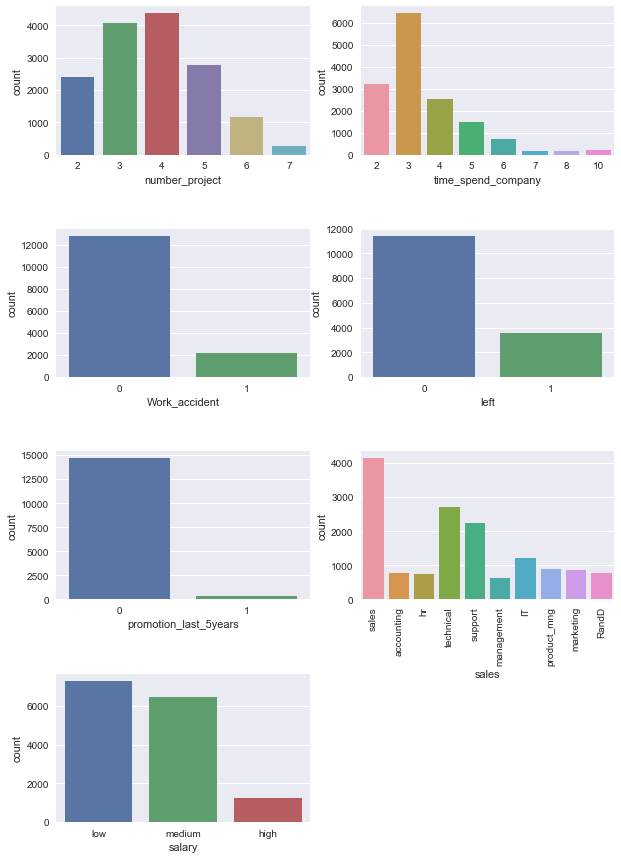

In [59]:
fig=plt.subplots(figsize=(10,15))
length=len(categorical)
for i,j in itertools.zip_longest(categorical,range(length)):
    #j+1 - gives the plot number
    plt.subplot(np.ceil(length/2),2,j+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x=i, data= Data)
    
plt.subplot(np.ceil(length/2),2,6)
plt.xticks(rotation=90)

In [60]:
len(Data[Data['left']==1]) #Here I'll pull out to gain understandng of total exits out of total. 

3571

In [61]:
3571/14999

0.2380825388359224

### Categorical Variable and Ordinal Variable

A categorical variable (sometimes called a nominal variable) is one that has two or more categories, but there is no intrinsic ordering to the categories.  For example, gender is a categorical variable having two categories (male and female) and there is no intrinsic ordering to the categories.  Hair color is also a categorical variable having a number of categories (blonde, brown, brunette, red, etc.) and again, there is no agreed way to order these from highest to lowest.  A purely categorical variable is one that simply allows you to assign categories but you cannot clearly order the variables.  If the variable has a clear ordering, then that variable would be an ordinal variable, as described below.

An ordinal variable is similar to a categorical variable.  The difference between the two is that there is a clear ordering of the variables.  For example, suppose you have a variable, economic status, with three categories (low, medium and high).  In addition to being able to classify people into these three categories, you can order the categories as low, medium and high. Now consider a variable like educational experience (with values such as elementary school graduate, high school graduate, some college and college graduate). These also can be ordered as elementary school, high school, some college, and college graduate.  Even though we can order these from lowest to highest, the spacing between the values may not be the same across the levels of the variables. Say we assign scores 1, 2, 3 and 4 to these four levels of educational experience and we compare the difference in education between categories one and two with the difference in educational experience between categories two and three, or the difference between categories three and four. The difference between categories one and two (elementary and high school) is probably much bigger than the difference between categories two and three (high school and some college).  In this example, we can order the people in level of educational experience but the size of the difference between categories is inconsistent (because the spacing between categories one and two is bigger than categories two and three).  If these categories were equally spaced, then the variable would be an interval variable.

http://stats.idre.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-interval-variables/

In [62]:
# here I look at the categorical variable
categorical=['number_project','time_spend_company','Work_accident','promotion_last_5years','sales','salary']

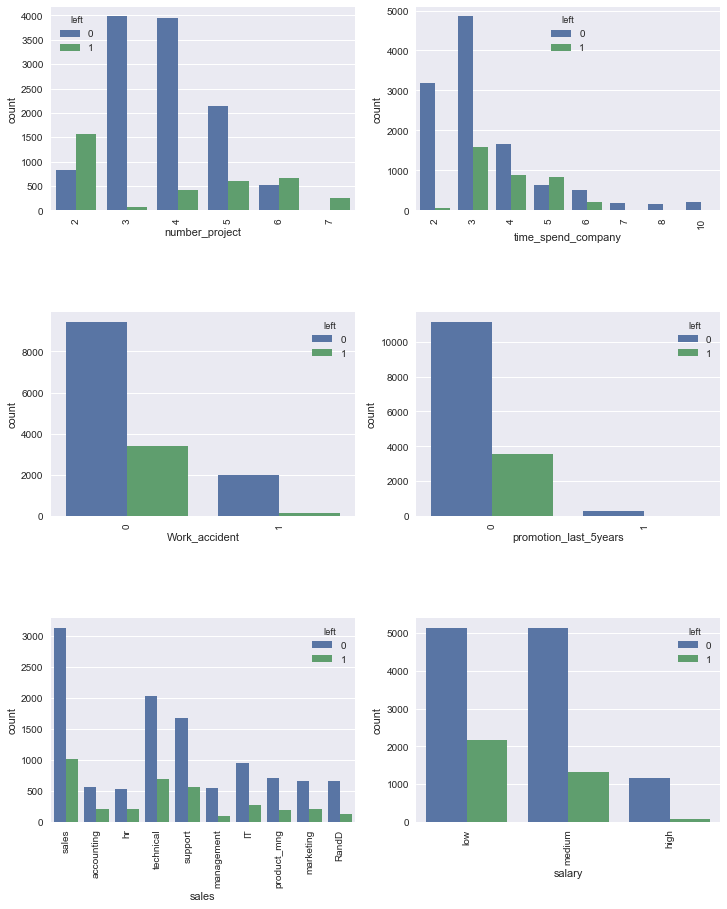

In [63]:
fig=plt.subplots(figsize=(12,15))
length = len(categorical)
for i,j in itertools.zip_longest(categorical,range(length)):
    plt.subplot(np.ceil(length/2),2,j+1)
    plt.subplots_adjust(hspace=.5)
    sns.countplot(x=i,data = Data,hue="left")
    plt.xticks(rotation=90)


## Observations
* Those who were promoted in last 5 years didn't leave the company
* Those who have spent 5 years in company are more in proportion compared to people staying back
* More than 6 years, people dont leave company anymore
* People who have done more than 7 projects have left the company.
* More than 6 years expr are not leaving company & more than 7 years are not staying back. So,  folks who have done many projects faster are leaving company

#### Proportions
* I can calculate proportions to get a second layer understanding of data. 

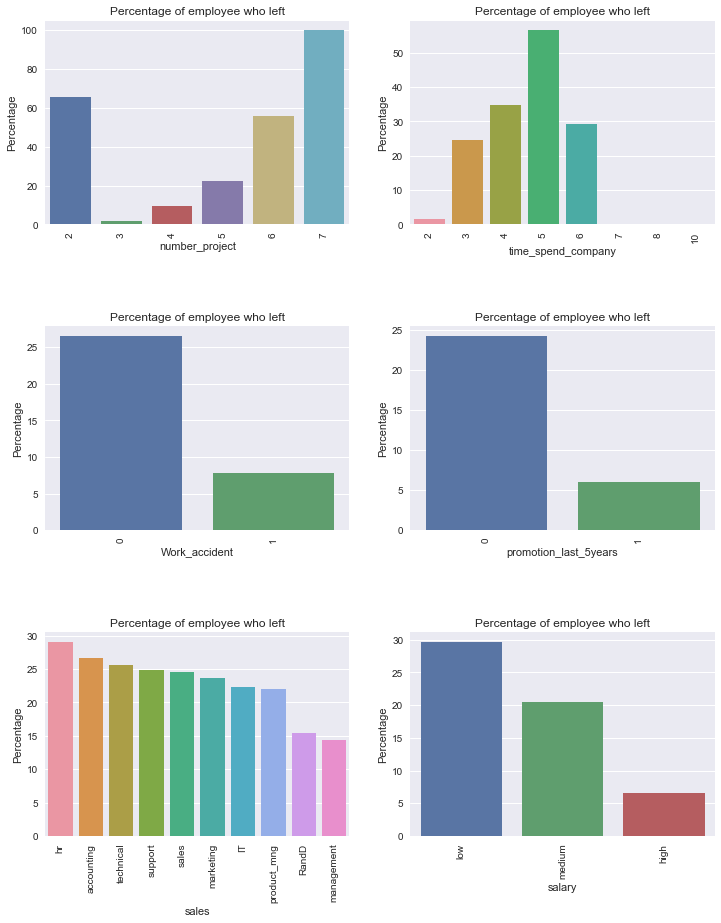

In [64]:
categorical = ['number_project','time_spend_company','Work_accident','promotion_last_5years','sales','salary']
length = len(categorical)

fig = plt.subplots(figsize=(12,15))
for i,j in itertools.zip_longest(categorical,range(length)):
    #To get proportions of exit we need two results:
    #One-number left (proportion) 
    #Two-Total number (proportion1)
    Proportion=Data.groupby([i])['left'].agg(lambda x:(x==1).sum()).reset_index()
    Proportion1=Data.groupby([i])['left'].count().reset_index()    
    
    #Since we need to plot these, we will convert them into a DataFrame using Pandas
    #(Proportion2)
    Proportion2=pd.merge(Proportion,Proportion1,on=i)

#Now I have the aggregate sum of'left' and count of all which makes the'total'...
#these are within i due to the iterator.
#I will proceed to make a DataFrame with the outcomes of the pandas groupby function above
    Proportion2['Proportion']=(Proportion2['left_x']/Proportion2['left_y'])*100

#We will now sort by percentage
    Proportion2=Proportion2.sort_values(by='Proportion',ascending=False).reset_index(drop=True)

#Plotting on graph
    plt.subplot(np.ceil(length/2),2,j+1)
    plt.subplots_adjust(hspace=.5)
    sns.barplot(x=i,y='Proportion',data=Proportion2)
    plt.xticks(rotation=90)
    plt.title("Percentage of employee who left")
    plt.ylabel('Percentage')

In [65]:
Proportion

,salary,left
0,high,82
1,low,2172
2,medium,1317


In [66]:
Proportion1

,salary,left
0,high,1237
1,low,7316
2,medium,6446


In [67]:
Proportion2

,salary,left_x,left_y,Proportion
0,low,2172,7316,29.688354
1,medium,1317,6446,20.431275
2,high,82,1237,6.628941


### Feature Engineering

My predictions of the most important dimensions in order to predict employee exit might be
based on gut. I'd like the machine to pick and advise. Here I can use feature engineering to engineer the features or dimensions.

Plotting a correlation matrix will help me correlate the features among each other to see where I can find the highest inverse relationship. 

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <a list of 8 Text xticklabel objects>)

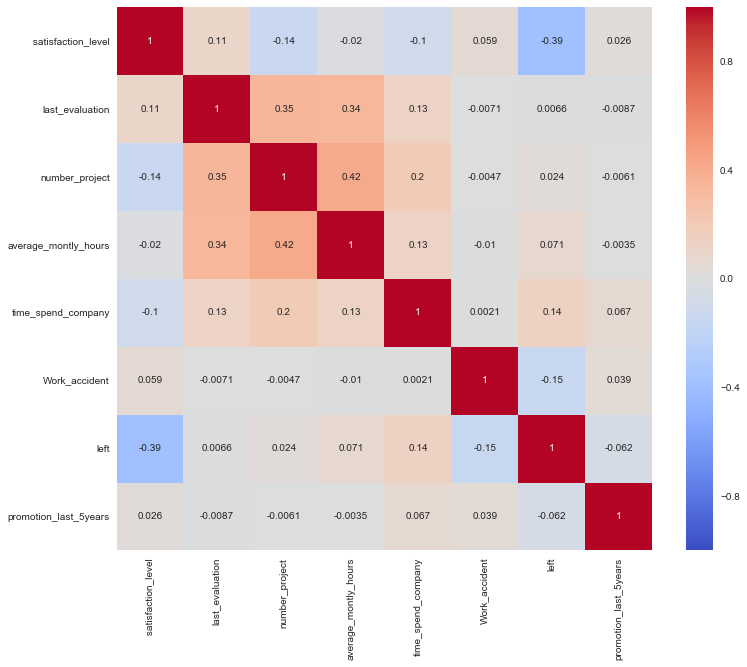

In [68]:
corr = Data.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,cbar=True, cmap="coolwarm")
plt.xticks(rotation=90)

##### Converting string data to number data
I have two labels namely sales and salary which are non numbers, in other words strings. 
The machine understands numbers and nothing else
Hence Il use a label encoder imported from the sklearn toolkit. 

In [95]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
LE = LabelEncoder()

Data['salary']=LE.fit_transform(Data['salary'])
Data['sales']=LE.fit_transform(Data['sales'])

In [99]:
# Data.head()
Data.isnull().any()

 satisfaction_level      False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool



###### Now that I have all features in a machine understandable format I can proceed with either:
    A) Picking an algo which can predict the best features
    B) Il summon a set of common algos using Python code and run them as a function 2 better equip A). 

###### For A) let's pick RandomForest as it is the most popular among classification algos

In [100]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

#Without using 'left' as a column
feat_var=Data.ix[:, Data.columns != 'left']

#Target Feature
pred_var = Data.ix[:, Data.columns == 'left']

#Training
model.fit(feat_var,pred_var.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [110]:
# feat_var
# np.isnan(pred_var).any()
np.isfinite(Data).any()

 satisfaction_level      True
last_evaluation          True
number_project           True
average_montly_hours     True
time_spend_company       True
Work_accident            True
left                     True
promotion_last_5years    True
sales                    True
salary                   True
dtype: bool

In [87]:
BestFeatures = pd.Series(model.feature_importances_,index=feat_var.columns).sort_values(ascending=False)

In [88]:
print(BestFeatures)

 satisfaction_level      0.343262
time_spend_company       0.180952
number_project           0.180008
average_montly_hours     0.152642
last_evaluation          0.117373
sales                    0.011851
salary                   0.007510
Work_accident            0.005476
promotion_last_5years    0.000925
dtype: float64


#### For B) I'l aggregate all the popular Machine Learning Models and integrate them as a Python function

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.naive_bayes import GaussianNB as GB
from sklearn.svm import SVC

In [90]:
def Classification_model(model,Data,x,y): # here x is the variable which are used for prediction
    # y is the prediction variable
    train,test = train_test_split(Data,test_size= 0.33)
    train_x = Data.ix[train.index,x] # Data for training only with features
    train_y = Data.ix[train.index,y] # Data for training only with predcition variable
    test_x = Data.ix[test.index,x] # same as for training 
    test_y = Data.ix[test.index,y]
    
    model.fit(train_x,train_y.values.ravel())
    
    pred=model.predict(test_x)
    
    accuracy=accuracy_score(test_y,pred)
    return accuracy

In [91]:
All_features=['satisfaction_level',
'number_project',
'time_spend_company',
'average_montly_hours',
'last_evaluation',
'sales',
'salary',
'Work_accident',       
'promotion_last_5years']

In [92]:
Important_features = ['satisfaction_level',
'number_project',
'time_spend_company',
'average_montly_hours',
'last_evaluation']

#Target Variable
Pred_var = ["left"]

In [93]:
models=["RandomForestClassifier","Gaussian Naive Bays","KNN","Logistic_Regression","Support_Vector"]
Classification_models = [RandomForestClassifier(n_estimators=100),GB(),knn(n_neighbors=7),LogisticRegression(),SVC()]
Model_Accuracy = []
for model in Classification_models:
    Accuracy=Classification_model(model,Data,All_features,Pred_var)
    Model_Accuracy.append(Accuracy)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
Data.is